
# Time Series

A time series is a sequence of data points collected at specific time intervals. In other words, it's a dataset where each data point is associated with a particular timestamp or time period. Time series data is used to observe how a variable changes over time and to identify patterns, trends, and fluctuations in that variable. This type of data is commonly encountered in various fields such as economics, finance, physics, biology, weather forecasting, and more.

Time series data can be univariate or multivariate. Univariate time series involves a single variable measured over time, while multivariate time series involves multiple variables measured over the same time intervals. The primary goal when analyzing time series data is often to forecast future values based on the patterns observed in the historical data.

Some common examples of time series data include:

1. **Stock Prices**: Daily closing prices of a company's stock over a period of time.
2. **Weather Data**: Daily temperature readings recorded at a specific location.
3. **Economic Indicators**: Monthly unemployment rates over several years.
4. **Web Traffic**: Hourly website visitors over a week.
5. **Sensor Readings**: Time-stamped measurements from sensors in industrial processes.
6. **Healthcare Data**: Daily patient admissions to a hospital.
7. **Social Media Activity**: Hourly tweet counts related to a specific topic.

Analyzing time series data involves various techniques, including:

1. **Descriptive Analysis**: Identifying trends, seasonality, and anomalies in the data.
2. **Forecasting**: Using historical patterns to predict future values of the time series.
3. **Smoothing**: Applying techniques to remove noise and highlight underlying trends.
4. **Decomposition**: Separating a time series into its trend, seasonality, and residual components.
5. **Statistical Models**: Utilizing techniques like ARIMA (AutoRegressive Integrated Moving Average) for forecasting.
6. **Machine Learning**: Employing algorithms like recurrent neural networks (RNNs) and Long Short-Term Memory (LSTM) networks for more complex analyses.

Time series analysis plays a crucial role in making informed decisions, predicting outcomes, and understanding the behavior of various phenomena that evolve over time.

# Importing Liberaries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA  # AutoRegressive Intergrated Moving Average
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults

In [2]:
# Loading the time series data
data = pd.read_csv('AirPassengers.csv')

# EDA

In [3]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
data['Month'] = pd.to_datetime(data['Month'])  # converting month column str to datetime
data.index = data['Month'] # making month column as a index column

data.head()


,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


In [8]:
del data['Month'] # deleting the month column

data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

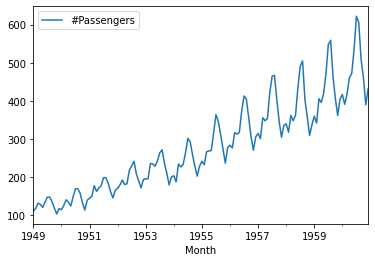

In [9]:
# Plotting the time series
data.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

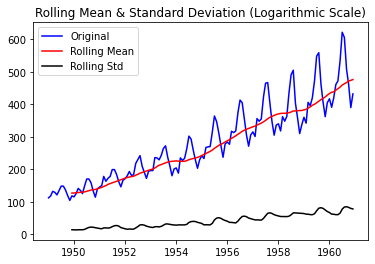

In [10]:
# Plotting rolling mean and rolling standard deviation on the above chart
mean_log = data.rolling(window=12).mean()  #12 month averge(mean)
std_log = data.rolling(window=12).std()    #12 month devaiation from mean or (std)

plt.plot(data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [11]:
mean_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


In [12]:
std_log

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,83.630500
1960-09-01,84.617276
1960-10-01,82.541954


In [13]:
# Checking the stationarity of the series by using Adfuller test
result1 = adfuller(data['#Passengers'])
result1

(0.8153688792060483,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [14]:
p_value1=result1[1]
p_value1

0.991880243437641

In [15]:
# Interpreting the p value
if p_value1 <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

NO Stationarity is present


<AxesSubplot:xlabel='Month'>

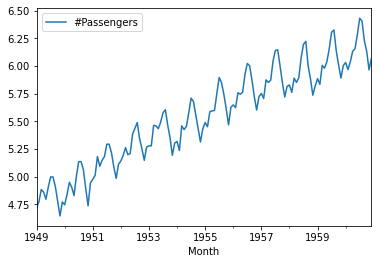

In [16]:
# Logrithmic comutation to make the time series stationary
first_log = np.log(data)
first_log = first_log.dropna()
first_log.plot()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

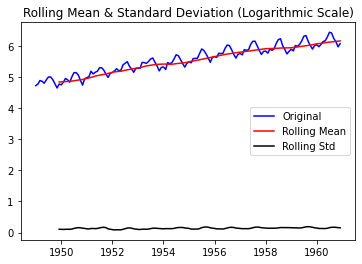

In [17]:
# Plotting rolling mean and rolling standard deviation on the above chart
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [18]:
# Normalising data
new_data = first_log - mean_log
new_data = new_data.dropna()
new_data.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [19]:
# Adfuller test for stationarity
result2 = adfuller(new_data['#Passengers'])
print(result2[1])

p_value2 = result2[1]

0.022234630001243667


In [20]:
# Interpreting the p value
if p_value2 <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

Stationarity is present


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

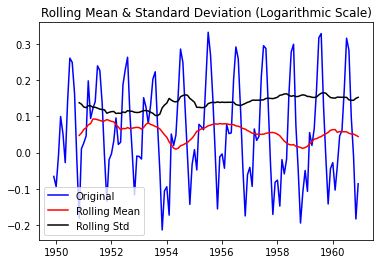

In [21]:
# Plotting rolling mean and rolling standard deviation on the normalized data
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [23]:
result3 = adfuller(new_data['#Passengers'])
print(result3[1])

p_value3 = result3[1]

0.022234630001243667


In [24]:
# Interpreting the p value
if p_value3 <=0.05:
    print('Stationarity is present')
else:
    print('NO Stationarity is present')

Stationarity is present


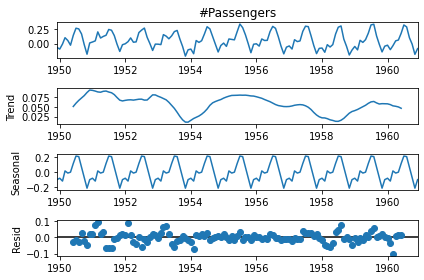

In [25]:
# Plotting Seasonal Decompose Chart

decompose_result = seasonal_decompose(new_data['#Passengers'].dropna())

decompose_result.plot();

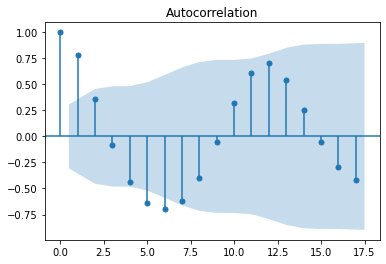

In [26]:
# Plotting AutoCorrelation Function for the data
# This will help to determine p,q and r values for ARIMA
acf_plot=acf(new_data)
plot_acf(acf_plot);

# Model Building

### ARIMA Model

In [28]:
train = new_data.iloc[:120]['#Passengers']
test = new_data.iloc[121:]['#Passengers']

model = ARIMA(train, order=(1,0,2))  #(p,d,q),p=autoregressive,d=differencing,q=moving average
model_fit = model.fit()
model_fit.summary()

e:\Apps\Anaconda\envs\directml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
e:\Apps\Anaconda\envs\directml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
e:\Apps\Anaconda\envs\directml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 117.901
Date:                Sat, 29 Jun 2024   AIC                           -225.803
Time:                        08:54:27   BIC                           -211.865
Sample:                    12-01-1949   HQIC                          -220.143
                         - 11-01-1959                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0538      0.022      2.446      0.014       0.011       0.097
ar.L1          0.4323      0.318      1.361      0.173      -0.190       1.055
ma.L1          0.5917      0.323      1.829      0.067      -0.042       1.226
ma.L2         -0.0778      0.279     -0.279      0.780      -0.625       0.469
sigma2         0.0081      0.002      4.769      0.000       0.005       0.011
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.02
Prob(Q):                              0.92   Prob(JB):                         0.05
Heteroskedasticity (H):               1.21   Skew:                            -0.08
Prob(H) (two-sided):                  0.55   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### ARIMA Model Prediction

<AxesSubplot:xlabel='Month'>

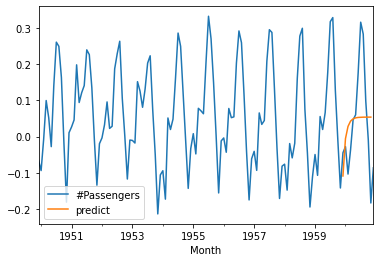

In [29]:
new_data['predict'] = model_fit.predict(start= len(train),
                                    end=len(train)+len(test)- 1,
                                    dynamic=True)
new_data[['#Passengers','predict']].plot()

In [30]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 1949-12-01 to 1960-12-01
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  133 non-null    float64
 1   predict      12 non-null     float64
dtypes: float64(2)
memory usage: 3.1 KB


In [31]:
test

Month
1960-01-01   -0.027530
1960-02-01   -0.103067
1960-03-01   -0.036530
1960-04-01    0.046332
1960-05-01    0.060186
1960-06-01    0.175033
1960-07-01    0.315151
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, dtype: float64

### SARIMAX Model

In [32]:
model = SARIMAX(train, order=(1,0,2), seasonal_order=(1,0,2,12))
model = model.fit()

e:\Apps\Anaconda\envs\directml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
e:\Apps\Anaconda\envs\directml\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
e:\Apps\Anaconda\envs\directml\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


#### SARIMAX Model Prediction

<AxesSubplot:xlabel='Month'>

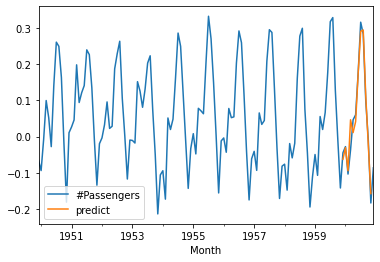

In [33]:
new_data['predict'] = model.predict(start= len(train) ,
                                                       end=len(train)+len(test)- 1,
                                                       dynamic=True)
new_data[['#Passengers','predict']].plot()

<AxesSubplot:xlabel='Month'>

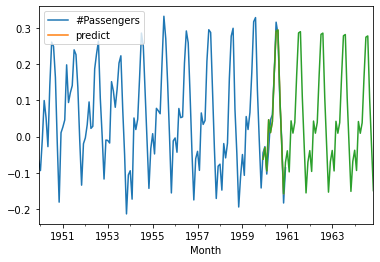

In [34]:
# Predicting the projections for the next 5 years
forecast = model.forecast(steps=60)
new_data.plot()
forecast.plot()

In [35]:
forecast

1959-12-01   -0.062113
1960-01-01   -0.030276
1960-02-01   -0.093996
1960-03-01    0.046457
1960-04-01    0.011039
1960-05-01    0.041194
1960-06-01    0.173407
1960-07-01    0.290089
1960-08-01    0.293695
1960-09-01    0.111268
1960-10-01   -0.023622
1960-11-01   -0.156817
1960-12-01   -0.070848
1961-01-01   -0.038957
1961-02-01   -0.097062
1961-03-01    0.043480
1961-04-01    0.009677
1961-05-01    0.039708
1961-06-01    0.170757
1961-07-01    0.285609
1961-08-01    0.289107
1961-09-01    0.109453
1961-10-01   -0.023516
1961-11-01   -0.154950
1961-12-01   -0.070038
1962-01-01   -0.038571
1962-02-01   -0.095797
1962-03-01    0.042845
1962-04-01    0.009527
1962-05-01    0.039153
1962-06-01    0.168398
1962-07-01    0.281668
1962-08-01    0.285119
1962-09-01    0.107943
1962-10-01   -0.023192
1962-11-01   -0.152813
1962-12-01   -0.069072
1963-01-01   -0.038039
1963-02-01   -0.094475
1963-03-01    0.042254
1963-04-01    0.009396
1963-05-01    0.038613
1963-06-01    0.166076
1963-07-01 